# Presidente Pedro: Social Segregation in Napoleon Dynamite

![Napoleon Dynamite butterfly hands](https://media.giphy.com/media/l3vRmoOpMBTLrPEsw/giphy.gif "Napoleon in the Happy Hands Club")

### The Model
[**Schelling's Model of Segregation**](http://ccl.northwestern.edu/netlogo/models/Segregation) 

The Python code for Schelling's model has been adapted from Dr. Babichenko's _Romeo and Juliet_ example, as seen in `SchellingModelWithRomeoAndJuliet.ipynb`.

### The Text
My model focuses on the character interactions in the 2004 film _Napoleon Dynamite_. The agents in the model are the characters in the film, divided into two categories: protagonists and antagonists. The protagonists are defined as anyone who has a positive affinity with Napoleon and helps him in some way. Antagonists have a negative affinity with Napoleon and trouble or impede him or his friends.

Because _Napoleon Dynamite_ features many less characters and much less dialogue than other literary works, such as _Romeo and Juliet_, adjustments had to be made to the parameters of the Schelling model to achieve meaningful results. The number of neighbors had to be reduced to 3, and the amount of similar neighbors 2.

## Implementation of Schelling model in _Napoleon Dynamite_
### Character statement parsing

In [168]:
# necessary imports
import random
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

# open and read transcript of film into Python
film = open('napoleon.txt') 
transcript = film.read()

### characters
# The agents in this project are the characters of the film.
# Characters are split into two categories: protagonists and antagonists.
# Napoleon and his friends serve as the protagonists.
# Any character that works against the interests of these characters is considered
# an antagonist.

# dictionary list of protagonists
protagonists = {
    'NAPOLEON' : [],
    'PEDRO' : [],
    'DEB' : [],
    'KIP' : [],
    'LAFAWNDUH' : []
}

# parsing text to extract protagonist lines
for character, statements in protagonists.items():
    start = 0
    while start != -1:
        start = transcript.find(character + ':\n')
        temp = transcript[start:]
        stop = temp.find('\n\n')
        statement = temp[:stop]
        protagonists[character].append(statement)
        transcript = transcript.replace(statement, '')

# dictionary list of antagonists
antagonists = {
    'GRANDMA' : [],
    'RICO' : [],
    'SUMMER' : [],
    'TRISHA' : [],
    'DON' : [],
    'REX' : []
}

# parsing text to extract antagonist lines
for character, statements in antagonists.items():
    start = 0
    while start != -1:
        start = transcript.find(character + ':\n')
        temp = transcript[start:]
        stop = temp.find('\n\n')
        statement = temp[:stop]
        antagonists[character].append(statement)
        transcript = transcript.replace(statement, '')

## Schelling model methods

In [169]:
### Schelling model
random.seed(10)  # For reproducible random numbers

# Each agent in the model is represented by an Agent object
class Agent:
    # Class constructor - initializes all the properties of an Agent object
    def __init__(self, agent_type, agent_name, agent_statement):
        self.type = agent_type
        self.name = agent_name
        self.statement = agent_statement.strip().replace('\n', '') # A bit of cleaning...
        self.draw_location()

    # Randomly place an agent on the virtual "grid"
    def draw_location(self):
        self.location = random.uniform(0, 1), random.uniform(0, 1)

        
    # Compute the Euclidean distance between self and other agent.
    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    # Determine if an agent is happy
    # True if sufficient number of nearest neighbors are of the same type.
    def happy(self, agents):
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # Unlike in the original model code, we will save the list
        # of nearest neighbors as a property of each agent - this way
        # each agent always knows its nearest neighbors
        self.neighbors = neighbors
        
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    
    # Update agent's position.
    # If agent is not happy, then randomly choose new locations until happy.
    def update(self, agents):
        while not self.happy(agents):
            self.draw_location()

## Agent generation from character list

In [170]:
num_neighbors = 3 # Number of agents regarded as neighbors
require_same_type = 2 # Want at least this many neighbors to be same type

agents = [] # list of agents

# list of protagonist agents
for character_name, statement_list in protagonists.items():
    # dictionary key is the name of the agent/character
    agent_name = character_name
    # random quote from film
    agent_statement = random.choice(statement_list)
    # create new agent
    agent = Agent(0, agent_name, agent_statement)
    # add agent to list
    agents.append(agent) 
    

# list of antagonist agents
for character_name, statement_list in antagonists.items():
    # dictionary key is the name of the agent/character
    agent_name = character_name 
    # random quote from film
    agent_statement = random.choice(statement_list)
    # create new agent
    agent = Agent(1, agent_name, agent_statement)
    # add agent to list
    agents.append(agent)

## Application of Schelling model

Entering loop  1
Entering loop  2
Entering loop  3
Converged, terminating.
NAPOLEON's neighbors: 
	DEB
	LAFAWNDUH
	KIP
PEDRO's neighbors: 
	KIP
	DEB
	NAPOLEON
DEB's neighbors: 
	NAPOLEON
	LAFAWNDUH
	KIP
KIP's neighbors: 
	PEDRO
	NAPOLEON
	DEB
LAFAWNDUH's neighbors: 
	NAPOLEON
	DEB
	KIP
GRANDMA's neighbors: 
	SUMMER
	TRISHA
	REX
RICO's neighbors: 
	DON
	GRANDMA
	KIP
SUMMER's neighbors: 
	REX
	GRANDMA
	TRISHA
TRISHA's neighbors: 
	SUMMER
	GRANDMA
	REX
DON's neighbors: 
	RICO
	GRANDMA
	TRISHA
REX's neighbors: 
	SUMMER
	GRANDMA
	TRISHA


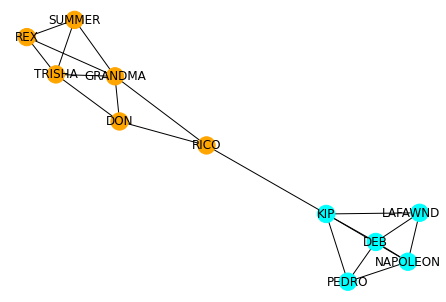

In [171]:
count = 1

### application of Schelling model
while True:
    print('Entering loop ', count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')

### neighbor iteration
for agent in agents: # Iterate through the list of agents
    print(agent.name + "'s neighbors: ")
    for n in agent.neighbors: # For each agent, iterate through its neighbors
        print('\t' + n.name)
        
### networkx graph generation
G = nx.Graph()

# add nodes to graph
for agent in agents:
    G.add_node(agent.name)
    
G.nodes()

# add edges
for agent in agents:
    for n in agent.neighbors:
        G.add_edge(agent.name, n.name)
        
# add color to nodes for easy differentiation
colors = []
for agent in G:
    if agent in protagonists:
        colors.append('cyan')
    else:
        colors.append('orange')

# draw graph
nx.draw(G, node_color = colors, with_labels = True)

In [185]:
# dialogue printout
for agent in agents: # Iterate through the list of agents
    print(agent.statement)
    # Randomly select a neighbor
    n = random.choice(agent.neighbors)
    print(n.statement)

NAPOLEON:The defect in that one is bleach.
DON:Hey, Napoleon, what'd you do all last summer again?
PEDRO:No. I ride by bike.
SUMMER:Like a wash, and then you blow-dry it with bleach. Yeah. It's so cool.
DEB:Pretty good. I could do a personal portrait sometime...if you wanted to come over.
KIP:Well, my chores are done. So, you ready, Lafawnduh?
KIP:Well, my chores are done. So, you ready, Lafawnduh?
DEB:Pretty good. I could do a personal portrait sometime...if you wanted to come over.

PEDRO:No. I ride by bike.
GRANDMA:Knock it off, Napoleon. Make yourself a dang quesadilla!
DEB:Pretty good. I could do a personal portrait sometime...if you wanted to come over.
RICO:Say, you know of a-- a place we can get our picture taken, like, a-- a photo store?
SUMMER:Like a wash, and then you blow-dry it with bleach. Yeah. It's so cool.
SUMMER:Like a wash, and then you blow-dry it with bleach. Yeah. It's so cool.
RICO:Say, you know of a-- a place we can get our picture taken, like, a-- a photo store

## What if Napoleon, Pedro, and Deb weren't friends?
The following code is identical to the above code, with the exception that Napoleon, Pedro, and Deb do not associate with each other. Because of the limit in characters and interactions, this was best implemented by subtracting happiness when they were neighbors. As a result of this experiment, the number of neighbors in the same group had to be lowered to 1.

The result is a network graph nonsensical in the context of the actual narrative. Pedro is isolated from all of the characters he interacts with. This is evident of the necessity in the narrative for the high school friends to band together to overcome their hardships together.

Entering loop  1
Entering loop  2
Converged, terminating.
NAPOLEON's neighbors: 
	KIP
	DON
	DEB
PEDRO's neighbors: 
	SUMMER
	LAFAWNDUH
	RICO
DEB's neighbors: 
	KIP
	GRANDMA
	NAPOLEON
KIP's neighbors: 
	DEB
	GRANDMA
	NAPOLEON
LAFAWNDUH's neighbors: 
	SUMMER
	PEDRO
	RICO
GRANDMA's neighbors: 
	KIP
	DEB
	RICO
RICO's neighbors: 
	PEDRO
	GRANDMA
	SUMMER
SUMMER's neighbors: 
	PEDRO
	LAFAWNDUH
	RICO
TRISHA's neighbors: 
	REX
	RICO
	DON
DON's neighbors: 
	NAPOLEON
	KIP
	GRANDMA
REX's neighbors: 
	TRISHA
	DON
	NAPOLEON


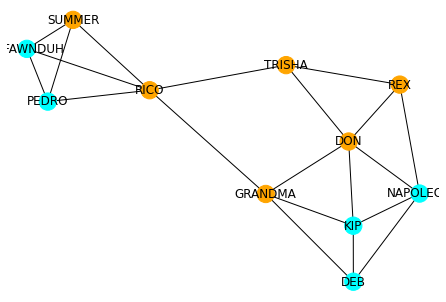

In [184]:
### Schelling model
random.seed(10)  # For reproducible random numbers

# Each agent in the model is represented by an Agent object
class Agent:
    # Class constructor - initializes all the properties of an Agent object
    def __init__(self, agent_type, agent_name, agent_statement):
        self.type = agent_type
        self.name = agent_name
        self.statement = agent_statement.strip().replace('\n', '') # A bit of cleaning...
        self.draw_location()

    # Randomly place an agent on the virtual "grid"
    def draw_location(self):
        self.location = random.uniform(0, 1), random.uniform(0, 1)

        
    # Compute the Euclidean distance between self and other agent.
    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    # Determine if an agent is happy
    # True if sufficient number of nearest neighbors are of the same type.
    def happy_antisocial(self, agents):
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # Unlike in the original model code, we will save the list
        # of nearest neighbors as a property of each agent - this way
        # each agent always knows its nearest neighbors
        self.neighbors = neighbors
        
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        
        # Napoleon, Pedro, and Deb "never meet"
        friends_names = ['NAPOLEON', 'PEDRO', 'DEB']
        if self.name in friends_names:
            for agent in neighbors:
                if agent.name in friends_names:
                    num_same_type = num_same_type - 1
        
        return num_same_type >= require_same_type

    
    # Update agent's position.
    # If agent is not happy, then randomly choose new locations until happy.
    def update(self, agents):
        while not self.happy_antisocial(agents):
            self.draw_location()

num_neighbors = 3 # Number of agents regarded as neighbors
require_same_type = 1 # Want at least this many neighbors to be same type

agents = [] # list of agents

# list of protagonist agents
for character_name, statement_list in protagonists.items():
    # dictionary key is the name of the agent/character
    agent_name = character_name
    # random quote from film
    agent_statement = random.choice(statement_list)
    # create new agent
    agent = Agent(0, agent_name, agent_statement)
    # add agent to list
    agents.append(agent) 
    

# list of antagonist agents
for character_name, statement_list in antagonists.items():
    # dictionary key is the name of the agent/character
    agent_name = character_name 
    # random quote from film
    agent_statement = random.choice(statement_list)
    # create new agent
    agent = Agent(1, agent_name, agent_statement)
    # add agent to list
    agents.append(agent)

count = 1

### application of Schelling model
while True:
    print('Entering loop ', count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')

### neighbor iteration
for agent in agents: # Iterate through the list of agents
    print(agent.name + "'s neighbors: ")
    for n in agent.neighbors: # For each agent, iterate through its neighbors
        print('\t' + n.name)
        
### networkx graph generation
G = nx.Graph()

# add nodes to graph
for agent in agents:
    G.add_node(agent.name)
    
G.nodes()

# add edges
for agent in agents:
    for n in agent.neighbors:
        G.add_edge(agent.name, n.name)
        
# add color to nodes for easy differentiation
colors = []
for agent in G:
    if agent in protagonists:
        colors.append('cyan')
    else:
        colors.append('orange')

# draw graph
nx.draw(G, node_color = colors, with_labels = True)

![Napoleon dancing](https://media.giphy.com/media/l378uHisF00ugOA36/giphy.gif)